# Loan Acceptance Prediction 

My personal goal for this notebook is to complete another EDA on a dataset, and create a guideline with all the steps for a ML Binary Classification Problem.

TOC:
1. [Problem Framing](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Prepare the Data](#t4.)
5. [Shortlisting Promising ML Models](#t5.)
6. [Fine-Tune the System](#t6.)
7. [Presenting the Solution](#t7.)

*References:*
* https://www.kaggle.com/yaheaal/loan-status-with-different-models
* https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

<a id="t1."></a>
## 1. Problem Framing

### Problem Definition

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

### The Data

This dataset was obtained from Kaggle and is named Loan Prediction Dataset. It contains a set of 613 records under 13 attributes:

* **Loan_ID:** A uniques loan ID
* **Gender:** Male/Female
* **Married:** Married(Yes)/Not married(No)  
* **Dependents:** Number of persons depending on the client.
* **Education:** Application Education (Graduate / Undergraduate)
* **Self_Employed:** Self employed (Yes/No)
* **ApplicantIncome:** Applicant income
* **CoapplicantIncome:** Coapplicant Income
* **LoanAmount:** Loan amount in thousands
* **Loan_Amount_Term:** Term of lean in months
* **Credit_History:** Credit history meets guidelines
* **Property_Area:** Urban/Semi and Rural
* **Loan_Status:** Loan approved (Y,N)

As we said, the main objective of this probles is to use machine learning techniques to predict loan payments, therefore, our target value is Loan_Status.

### Preparing the tools

In [1]:
#basic libraries
import sys
import numpy as np
import pandas as pd
import os
import warnings

#seed the project
np.random.seed(64)

#ploting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#ML preprocessing
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

# ML models


# ML model evaluattion
from sklearn.model_selection import cross_val_score



#relevant ML libraries
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


#ML models

#warning hadle
warnings.filterwarnings("ignore")

print("Set up completed")

Set up completed


### Load the Data

In [2]:
# Import train and test data
train_df = pd.read_csv('data/loan_train.csv')
test_df = pd.read_csv('data/loan_test.csv')

In [3]:
# Print the first rows of the training data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Print the first rows of the test data
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<a id="t2."></a>
## 2. Data Quality & Missing Values Assessment

### Data Types
We can see our dataset consist on different types of data. As we continue to analyze it, we'll find features which are numerical and should actually be categorial.

In [5]:
# Different data types in the dataset
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Missing Values

As you can see we have some missing data, let's have a look how many we have for each column:

In [6]:
# We need to see the amount of missing values present in each column.
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

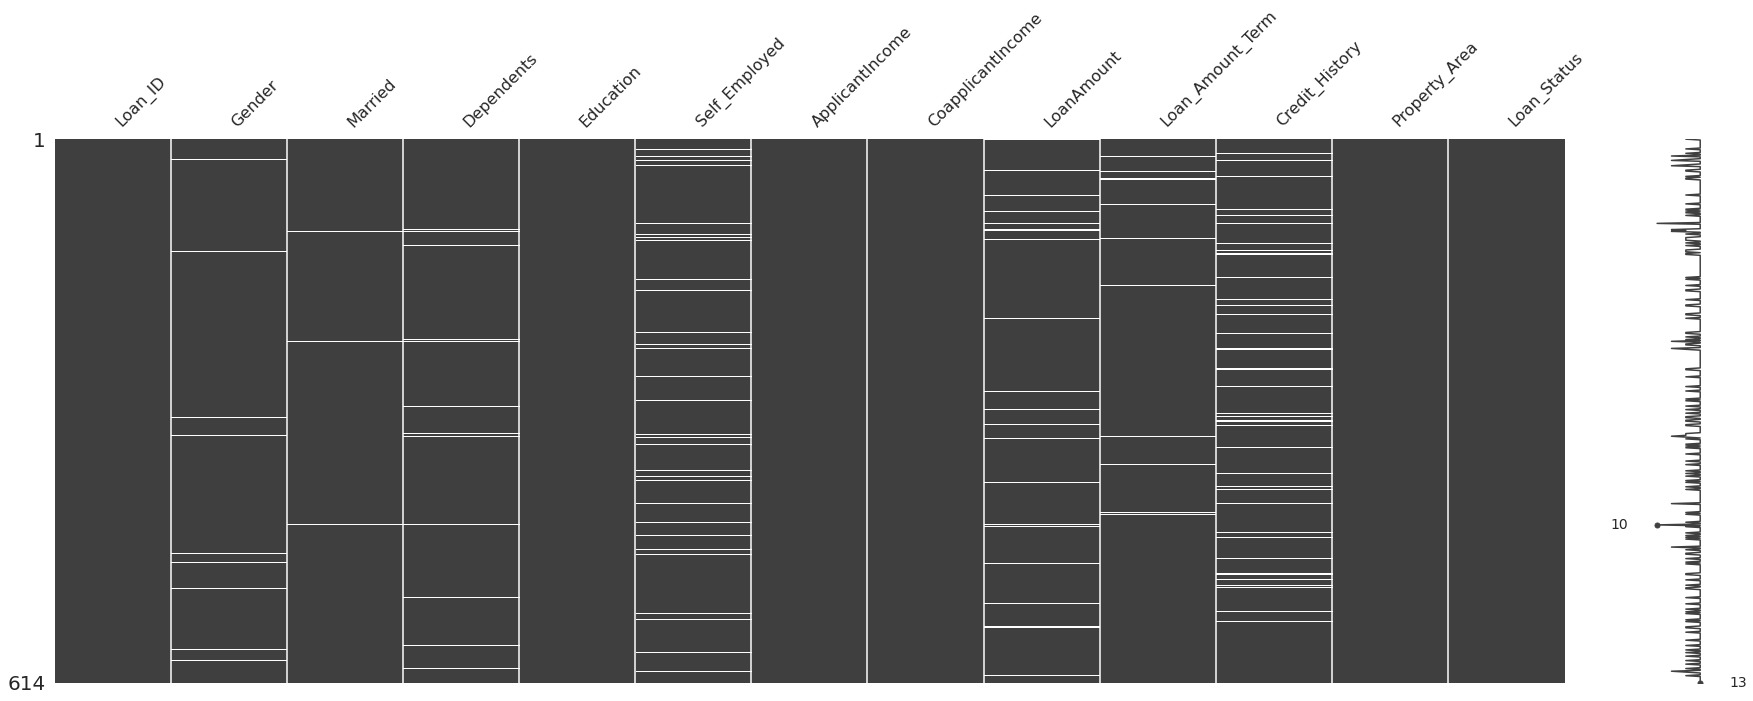

In [7]:
# Plot graphic of missing values
missingno.matrix(train_df, figsize = (30,10));

It is important to check which columns contain empty values, as most ML models don't work when these are present. In this case, we can see that the columns Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History have missing values. But as we can confirm, none of these features have enough missing attributes to discard it. But to be able to continue with our analysis we can't have any na value, so we will replace them by the most frequent value.

<a id="t2."></a>
## 3. Exploration Data Analysis

### Exploration of our Target Feature: Loan Status

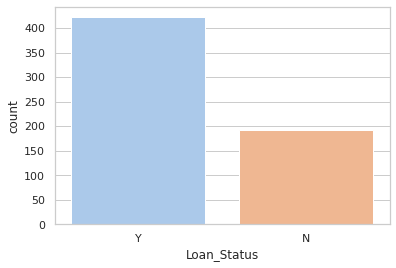

In [8]:
sns.countplot('Loan_Status', data=train_df);

### Exploration of Applicant Income

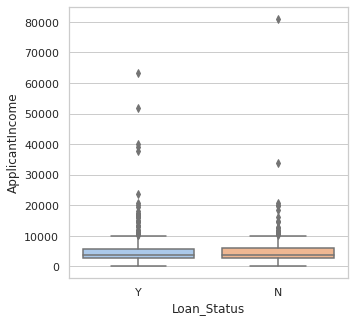

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df);

Both groups, the one that had their loan approved and the ones that didn't, seem that have a very similar pattern, therefore, we wouldn't consider the applicant's income as an important feature for our analysis.

### Exploration of Coapplicant Income

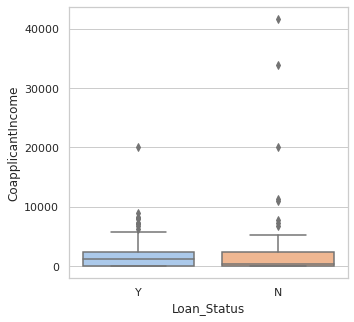

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train_df);

We do actually see a different pattern between both groups, so we can say that the Coapplicant Income is a an important feature for this ML modern.

### Exploration of Loan Amount

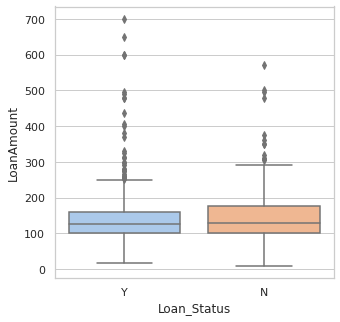

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df);

Both groups seem to have a very similar pattern, therefore, we wouldn't consider the loan amount an important feature for our analysis.

### Exploration of Loan Amount Term

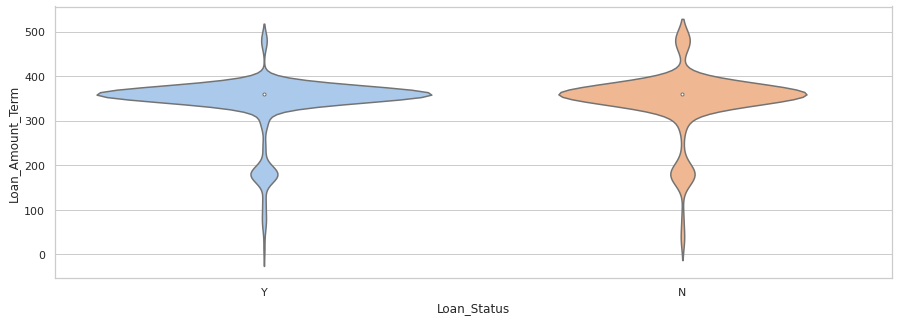

In [12]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Loan_Status', y='Loan_Amount_Term', data=train_df);

Looking at this plots, we can't see a significant difference between the subjects that got the loan accepted and the ones that didn't.

### Exploration of Credit History

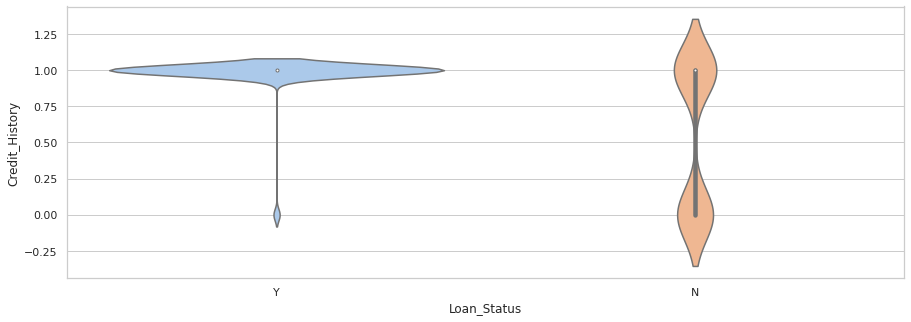

In [13]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Loan_Status', y='Credit_History', data=train_df);

It can be seen that if you got a Credit History = 1, you have a better chance to get a loan. This is an important feature for our future analysis. But we can clearly see this is actually a categorical variable, as we can see that it is 1 or 2

In [14]:
train_df['Credit_History'] = train_df['Credit_History'].astype('O')

### Exploration of Gender

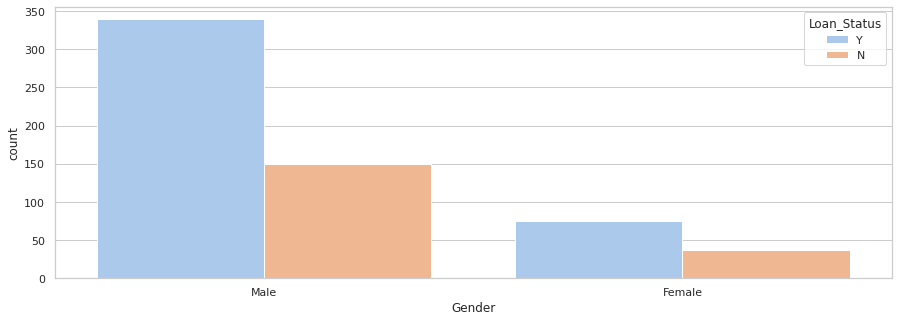

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='Gender', hue='Loan_Status', data=train_df);

We don't see a pattern here, most males got a loan but most females also did. As of now we wouldn't classify it as an important feature for our model.

### Exploration of Married

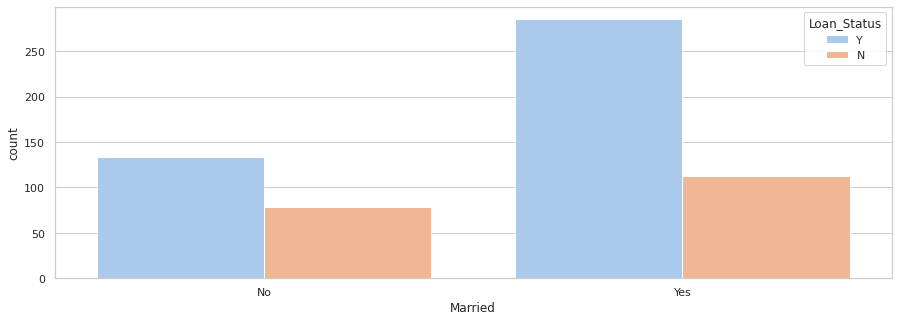

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=train_df);

We can see that if you are married you have a better chance of getting a loan, this seems like a good feature.

### Exploration of Dependents

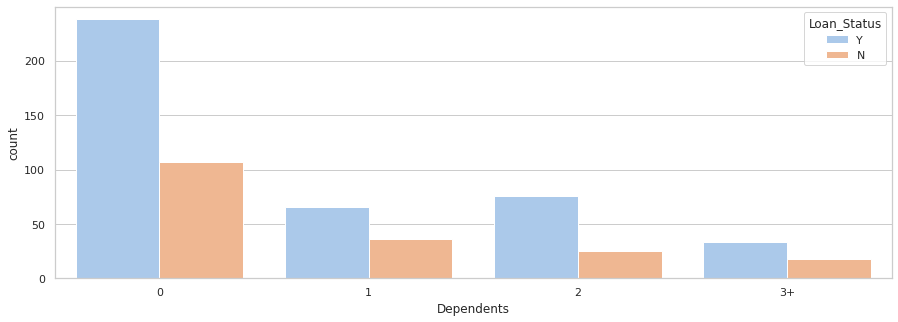

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=train_df);

It seems that if the applicant has zero dependent members, they have a higher chance ot get a loan, this also seems like a good feature.

### Exploration of Education

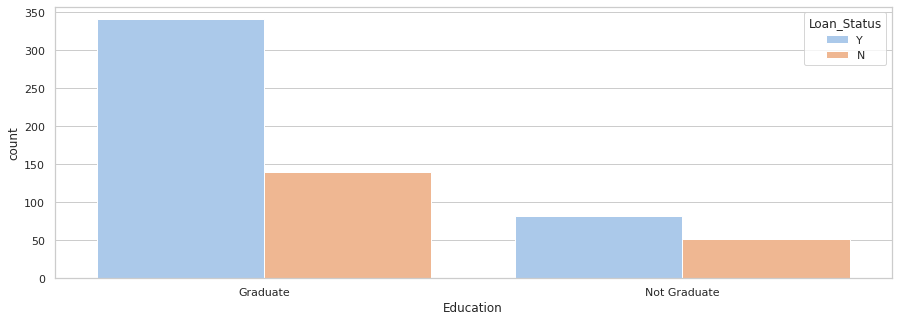

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Education', hue='Loan_Status', data=train_df);

It seems that graduated students have a slight more chance of getting a loan accepted. This might be and important feature.

### Exploration of Self Employed

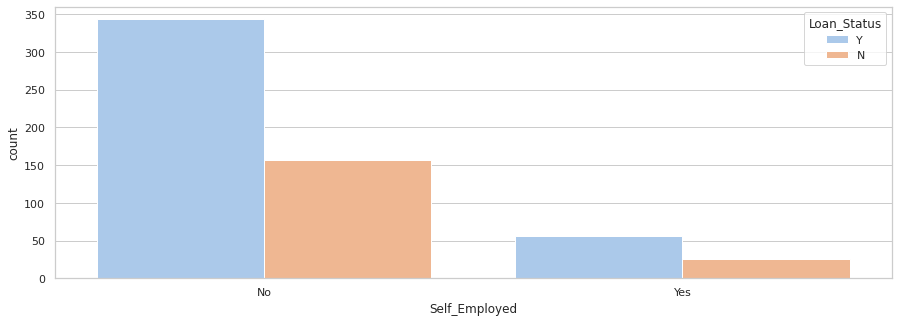

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df);

If you are self-employed or not, you will get almost the same chance to get a loan, we don't see a pattern, therefore, this doesn't seem like an important feature.

### Exploration of Property Area

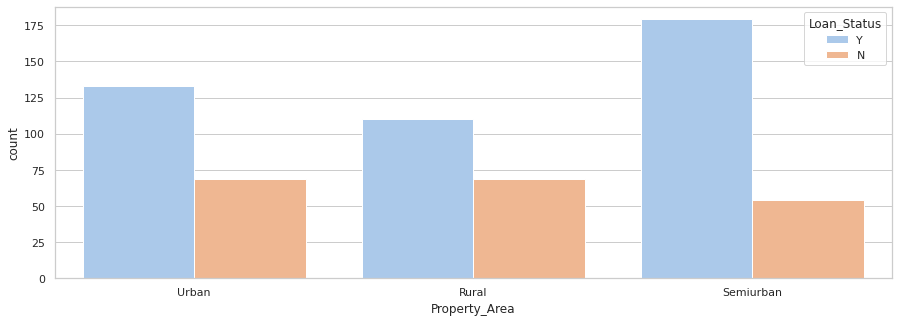

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df);

We can see that living in a semiurban are gives you the biggest chance to get a loan approved. This seems like a good feature.

<a id="t4."></a>
## 4. Preparing the Data

### Feature Selection

As we saw earlier, there are some features that seem more useful for this project than others. Given this, one of our goals will be to drop the following features: ['Loan_ID','ApplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Gender','Self_Employed']; that were declared not interesting during the previous discussion.

In [21]:
# safety copy of our current df
train = train_df.copy()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Numerical Attributes Pipeline

To get our dataset ready for our ML algorithms, we need to deal with missing data. In this case we'll opt for replacing NAs with the mean. For simplicity, we do this for all numerical variables.

A part from dropping the na values, it is also important to note that a few machine learning algorithms are highly sensitive to features that span varying degrees of magnitude, range, and units. This is why feature scaling is a crucial part of the data preprocessing stage.

In [22]:
num_attribs = ['CoapplicantIncome']
train_num = train[num_attribs]

In [23]:
num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

### Categorical Attributes Pipeline

In [24]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = train['Loan_Status']
train.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

Machine Learning algorithms work better with numbers, so we will convert our categorical variables. We can transform our data to have a singular attribute per category. This process is called one-hot encoding (also known as dummy variables/attributes). 

In [25]:
cat_attribs = ['Married', 'Dependents', 'Education', 'Property_Area', 'Credit_History']
train_cat = train[cat_attribs]

In [26]:
cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy="most_frequent", fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown='ignore')),
    ])

We can't forget about our target feature; 'Loan_Status', we need to transform this column.

### Full Pipeline

In [27]:
preprocess_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [28]:
X = preprocess_pipeline.fit_transform(train)
X

array([[-0.55448733,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.03873155,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.55448733,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.47240418,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.55448733,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.55448733,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
X.shape

(614, 14)

In [30]:
y = target

### Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="t5."></a>
## 5. Shortlisting Promising ML Models

We will use 5 of the most used models for training binary classifying ptoblems.

* Logistic Regression
* KNeighbors Classifier
* SVC
* Decision Tree Classifier
* Random Forest Classifier

In [32]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

As we fit and train our models, we will be using cross-validation to have an idea of how good our model is.

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=64)
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.9462881514061


In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 76.7119818739171


In [35]:
from sklearn.svm import SVC

model = SVC(random_state=64)
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.9462881514061


In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=64)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 74.10502465680395


In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=64)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 75.077968812475


<a id="t6."></a>
## 6. Fine-Tune the System

### Hyperparameter tuning

First, we will need the help of a correlation matrix to see if we made the right decision when choosing features or we should remove or add another feature to our  models.

### Outliers

### Features Selection

<a id="t7."></a>
## 7. Presenting the Solution

### Let's predict on our test set

In [42]:
# safety copy of our the test df
test = test_df.copy()

X_test = preprocess_pipeline.transform(test)
X_test

array([[-0.55448733,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.04146765,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.06113628,  0.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12714481,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26395006,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.55448733,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [43]:
y_pred = svm_clf.predict(X_test)

NameError: name 'svm_clf' is not defined